<a href="https://colab.research.google.com/github/Dhivyadarsshni/PrimaryAmoebicMeningoencephalitis-Py-Code/blob/main/PAM_%5BRandom_Forest%5D_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

Data Collection and Analysis

In [ ]:
PAM_dataset = pd.read_csv('/content/PAM Dataset -Final.csv')

In [ ]:
# To print the first 5 rows of the dataset
PAM_dataset.head()

,Age,Gender,Infection period,Fever,Sensitivity to light,Stiff neck,Altered Sensorium,CSF - WBC (cells/μL),CSF - Glucose (mg/dL),CSF - Protein (mg/dL),Meningitis,CSF - Direct Microscopy,PAM
0,46,Male,7,Y,N,Y,N,2,48,30,0,Negative,Negative
1,37,Male,6,Y,Y,Y,N,994,18,404,1,Positive,Confirmed
2,13,Female,5,Y,N,Y,Y,1,53,25,0,Negative,Negative
3,21,Male,8,Y,Y,N,N,356,57,89,1,Negative,Negative
4,59,Male,4,Y,N,Y,N,279,39,470,1,Positive,Confirmed


In [ ]:
# To print the number of rows and columns present in the dataset
PAM_dataset.shape

(881, 13)

In [ ]:
# To identify the count of 'Confirmed' and 'Negative' cases
PAM_dataset['PAM'].value_counts()

,count
PAM,
Negative,500
Confirmed,381


In [ ]:
PAM_dataset.groupby('PAM').mean('Infection period, CSF - WBC (cells/μL), CSF - Glucose (mg/dL), CSF - Protein (mg/dL), Meningitis')

,Age,Infection period,CSF - WBC (cells/μL),CSF - Glucose (mg/dL),CSF - Protein (mg/dL),Meningitis
PAM,,,,,,
Confirmed,31.511811,6.976378,1101.52231,19.721785,314.734908,1.000
Negative,30.906000,7.046000,453.51000,55.112000,74.770000,0.292


In [ ]:
# Separate data and labels
X = PAM_dataset.drop(columns=['PAM', 'Gender', 'Fever', 'Sensitivity to light', 'Stiff neck', 'Altered Sensorium', 'CSF - Direct Microscopy'])
Y = PAM_dataset['PAM']

Data Standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=1)

In [ ]:
# Initialize Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=1)

In [ ]:
# Train the Random Forest Classifier
classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

Model Evaluation

In [ ]:
# Accuracy Score for Training Data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f" Training data Accuracy: {training_data_accuracy * 100:.2f}%")

 Training data Accuracy: 100.00%


In [ ]:
# Accuracy Score for Test Data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f" Testing data Accuracy: {test_data_accuracy* 100:.2f}%")

 Testing data Accuracy: 99.10%


Precision Details

In [ ]:
# Precision Score for Training Data
X_train_prediction= classifier.predict(X_train)
train_data_precision= precision_score(Y_train,X_train_prediction, pos_label='Confirmed')
print(f" Training data Precision: {train_data_precision * 100:.2f}%")

 Training data Precision: 100.00%


In [ ]:
# Precision Score for Test Data
X_test_prediction= classifier.predict(X_test)
test_data_precision= precision_score(Y_test,X_test_prediction, pos_label='Confirmed')
print(f" Testing data Precision: {test_data_precision * 100:.2f}%")

 Testing data Precision: 98.96%


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score

# Define the scoring function using precision
precision_scorer = make_scorer(precision_score, pos_label='Confirmed')

# Perform cross-validation (let's say using 5 folds)
# cv = 5 means 5-fold cross-validation
scores = cross_val_score(classifier, X, Y, cv=5, scoring=precision_scorer)

# Print the precision for each fold and the average precision
print("Precision scores for each fold: ", scores)
print("Average precision score: ", scores.mean())


Precision scores for each fold:  [0.88888889 0.97402597 0.97435897 0.97435897 0.9382716 ]
Average precision score:  0.9499808833142167


Visualization

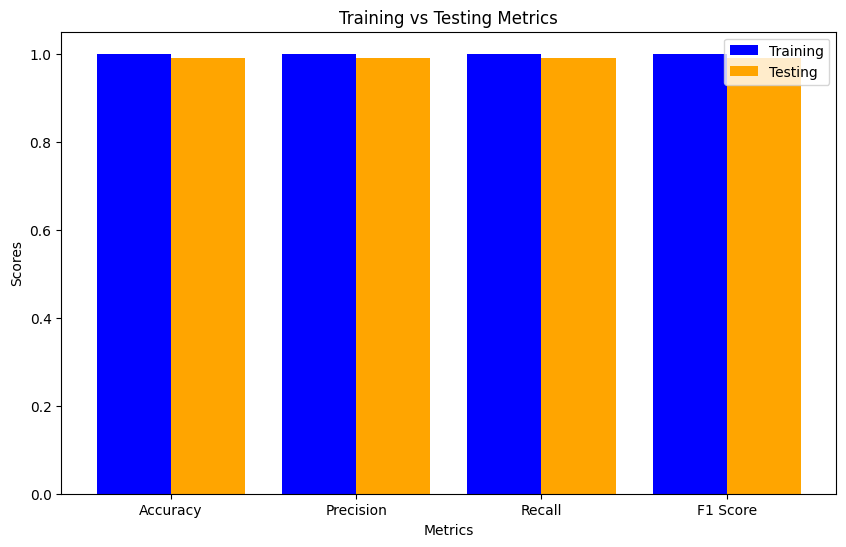

Training Metrics:
  Accuracy: 100.00%
  Precision: 100.00%
  Recall: 100.00%
  F1 Score: 100.00%

Testing Metrics:
  Accuracy: 99.10%
  Precision: 98.96%
  Recall: 98.96%
  F1 Score: 98.96%



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=1)
classifier.fit(X_train, Y_train)

# Generate predictions for training and testing sets
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

# Calculate metrics for training data
accuracy_train = accuracy_score(Y_train, Y_train_pred)
precision_train = precision_score(Y_train, Y_train_pred, pos_label='Confirmed', average='binary')
recall_train = recall_score(Y_train, Y_train_pred, pos_label='Confirmed', average='binary')
f1_train = f1_score(Y_train, Y_train_pred, pos_label='Confirmed', average='binary')

# Calculate metrics for testing data
accuracy_test = accuracy_score(Y_test, Y_test_pred)
precision_test = precision_score(Y_test, Y_test_pred, pos_label='Confirmed', average='binary')
recall_test = recall_score(Y_test, Y_test_pred, pos_label='Confirmed', average='binary')
f1_test = f1_score(Y_test, Y_test_pred, pos_label='Confirmed', average='binary')


# Organize metrics for plotting
metrics_train = [accuracy_train, precision_train, recall_train, f1_train]
metrics_test = [accuracy_test, precision_test, recall_test, f1_test]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plotting
x = range(len(metrics_labels))

plt.figure(figsize=(10, 6))
plt.bar(x, metrics_train, width=0.4, label='Training', color='blue', align='center')
plt.bar([i + 0.4 for i in x], metrics_test, width=0.4, label='Testing', color='orange', align='center')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Training vs Testing Metrics')
plt.xticks([i + 0.2 for i in x], metrics_labels)
plt.legend()
plt.show()

# Print the metrics in percentage format
print("Training Metrics:")
print(f"  Accuracy: {accuracy_train * 100:.2f}%")
print(f"  Precision: {precision_train * 100:.2f}%")
print(f"  Recall: {recall_train * 100:.2f}%")
print(f"  F1 Score: {f1_train * 100:.2f}%\n")

print("Testing Metrics:")
print(f"  Accuracy: {accuracy_test * 100:.2f}%")
print(f"  Precision: {precision_test * 100:.2f}%")
print(f"  Recall: {recall_test * 100:.2f}%")
print(f"  F1 Score: {f1_test * 100:.2f}%\n")

Confusion Matrix

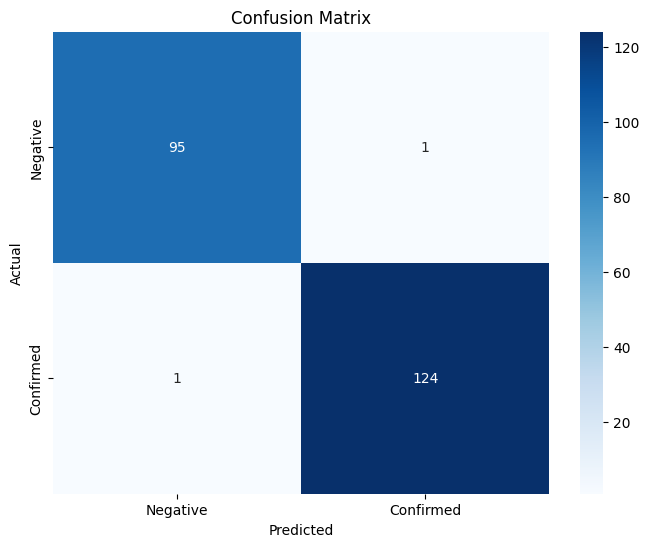

Classification Report:
              precision    recall  f1-score   support

   Confirmed       0.99      0.99      0.99        96
    Negative       0.99      0.99      0.99       125

    accuracy                           0.99       221
   macro avg       0.99      0.99      0.99       221
weighted avg       0.99      0.99      0.99       221



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, Y_train are defined
best_model = RandomForestClassifier()
best_model.fit(X_train, Y_train)

# Step 1: Predict on the test set using the best model
Y_pred = best_model.predict(X_test)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Step 3: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Confirmed'], yticklabels=['Negative', 'Confirmed'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Print classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))



Feature Importance

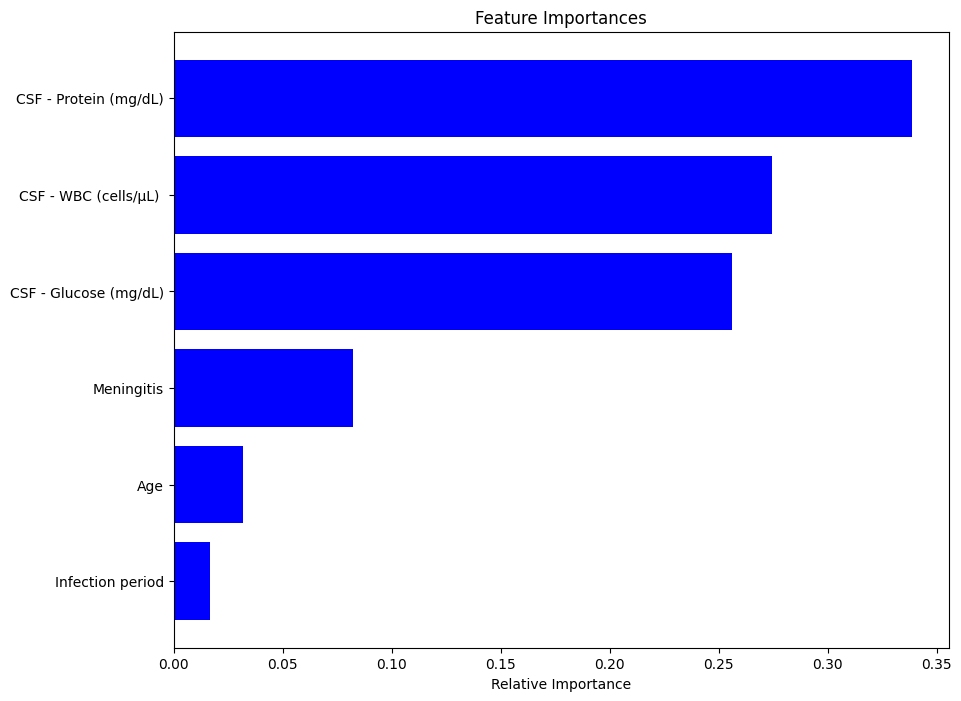

In [ ]:
features = PAM_dataset.drop(columns=['PAM', 'Gender', 'Fever', 'Sensitivity to light', 'Stiff neck', 'Altered Sensorium', 'CSF - Direct Microscopy']).columns

# Compute feature importances
feature_importances = classifier.feature_importances_

# Sort feature importances
indices = np.argsort(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

ROC Curve

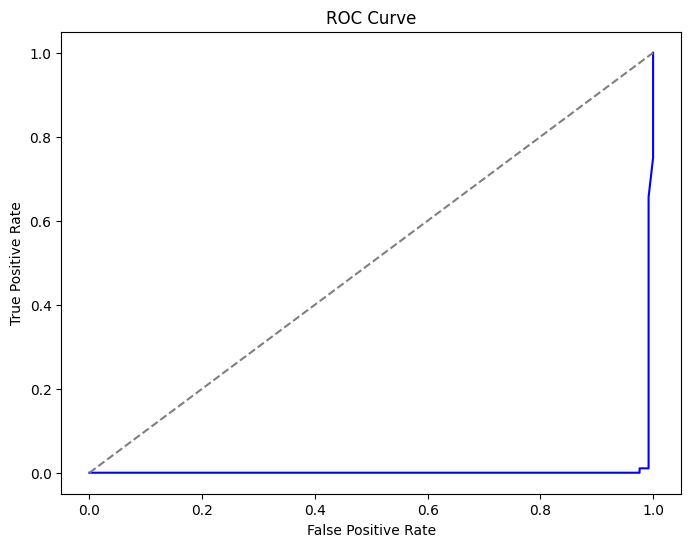

Area Under the Curve (AUC): 0.9942083333333334


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

Y_prob = classifier.predict_proba(X_test)[:,1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob, pos_label='Confirmed')

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Optional: AUC score
auc = roc_auc_score(Y_test, Y_prob)
print(f'Area Under the Curve (AUC): {auc}')

Precision Recall Curve

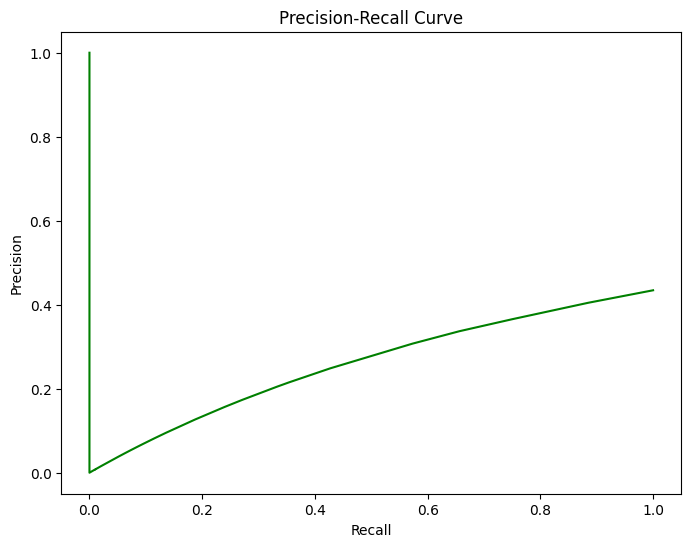

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_test, Y_prob, pos_label='Confirmed')

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Class Distribution

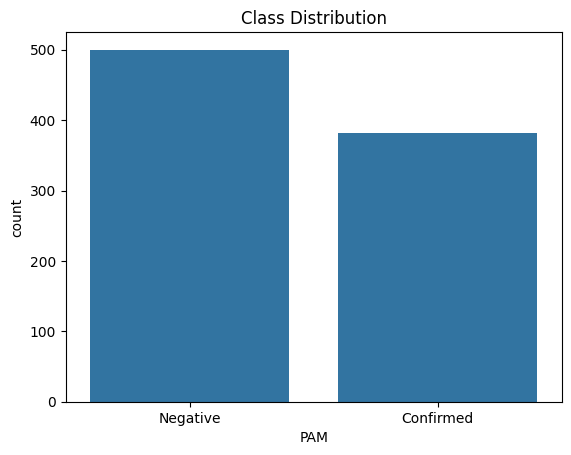

In [ ]:
sns.countplot(x='PAM', data=PAM_dataset)
plt.title('Class Distribution')
plt.show()

Correlation Heatmap

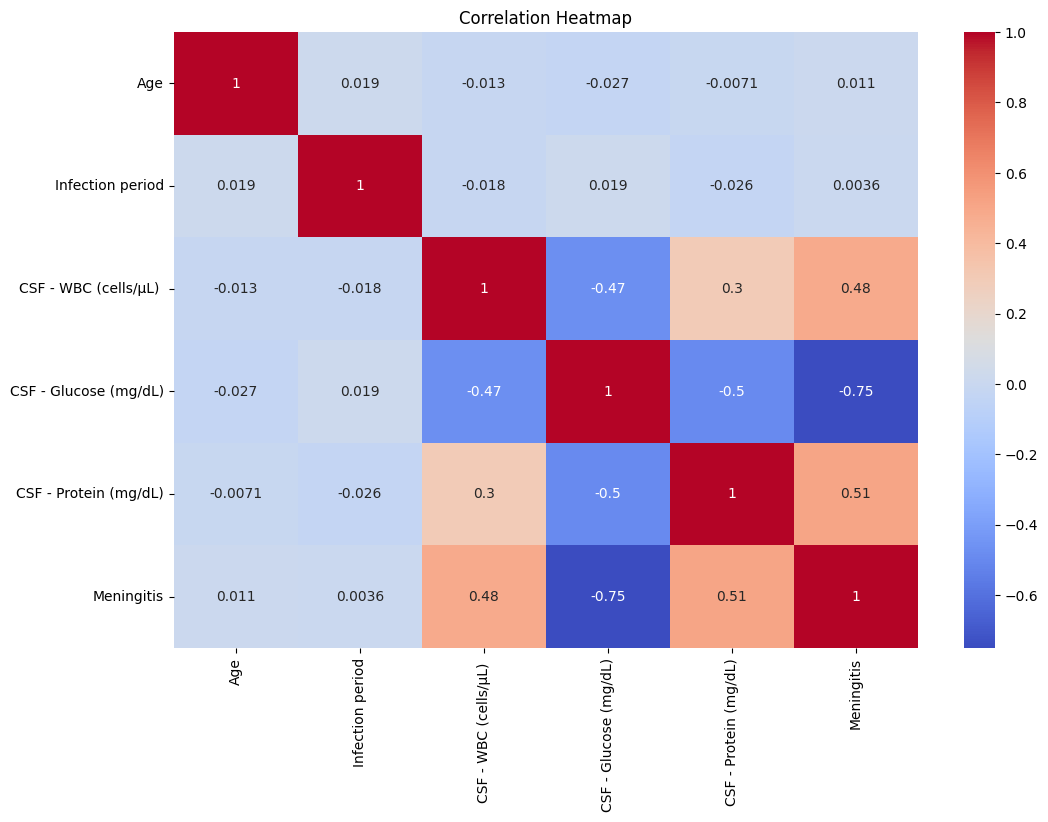

In [ ]:
# Drop non-numeric and irrelevant columns
PAM_dataset_numeric = PAM_dataset.drop(columns=['PAM', 'Gender', 'Fever', 'Sensitivity to light', 'Stiff neck', 'Altered Sensorium', 'CSF - Direct Microscopy'])

# Compute correlation
correlation_matrix = PAM_dataset_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Predictive System

In [ ]:
# Example input data
input_data = (22, 9, 1, 50, 22, 0)

# Change input_data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array for a single instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Prediction using the trained Random Forest model
prediction = classifier.predict(std_data)
print(prediction)

# Output the result
if prediction[0] == 'Negative':
    print('No signs of Primary Amoebic Meningoencephalitis')
else:
    print('Primary Amoebic Meningoencephalitis is Confirmed')

['Negative']
No signs of Primary Amoebic Meningoencephalitis


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (47,4,145,11,183, 1)  # Example input data

# Change input_data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array for a single instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Prediction using the trained Random Forest model
prediction = classifier.predict(std_data)
print(prediction)

# Output the result
if prediction[0] == 'Negative':
    print('No signs of Primary Amoebic Meningoencephalitis')
else:
    print('Primary Amoebic Meningoencephalitis is Confirmed')

['Confirmed']
Primary Amoebic Meningoencephalitis is Confirmed


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
